In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
# Change working directory to the root of the project, try to be cautious with this implementation since it will break if the cell is run more than once
os.chdir(r"../..")

import pandas as pd
from resources.constants import *
from src import load_dataframes

outfits_df = pd.read_pickle(os.path.join(DATA_SAVE_PATH, "outfits_df_lifespan.gz"), compression='gzip')

In [13]:
outfits_df.head(2)

,id,status,owner,name,brand,oldPrice,description,isPublic,isDeleted,timeCreated,timeUpdated,rand,retailPrice,meta.validFrom,meta.validTo,group,outfit_tags,tag_categories
0,outfit.00004b4d01ca4ab0a70cf073ba74fefa,CLEAN,user.66d3a17f5dd149f1845bbaf223c67cc3,Yugen Black Cardigan,FWSS,,The FWSS Yugen Cardigan is a form-fitted cardi...,1,0,2022-03-01 10:58:12.456,2022-11-14 03:55:48.418,0.271459,1900.0000,2022-03-01 10:58:12.456,2022-05-20 14:06:42.672000,group.4002da292009a8bb0d403bbaf734184e,"[Winter, Everyday, Fall, FWSS, Wool, M, Women,...","[Seasons, Occasion, Seasons, Brand, Material, ..."
1,outfit.00004b4d01ca4ab0a70cf073ba74fefa,CLEAN,user.66d3a17f5dd149f1845bbaf223c67cc3,Yugen Black Cardigan,FWSS,,The FWSS Yugen Cardigan is a form-fitted cardi...,1,0,2022-03-01 10:58:12.456,2023-03-09 08:49:58.691,0.720753,1900.0000,2022-05-20 14:06:42.672,2023-03-09 08:49:58.653000,group.4002da292009a8bb0d403bbaf734184e,"[Winter, Everyday, Fall, FWSS, Wool, M, Women,...","[Seasons, Occasion, Seasons, Brand, Material, ..."


In [79]:
import numpy as np

# stopwords = outfits_df["outfit_tags"].explode().unique()
# stopwords = [word.lower() for word in stopwords if type(word) == str]

stopwords_dict = {tag.lower().replace(" ", "-"):category for tag, category in zip(outfits_df["outfit_tags"].explode(), outfits_df["tag_categories"].explode()) if category and type(category) != float and category != "brand"}
tag_list = [tag.lower().replace(" ", "-") for tag, category in zip(outfits_df["outfit_tags"].explode(), outfits_df["tag_categories"].explode()) if category and type(category) != float and category != "brand"]
tag_freq_dict = {tag:tag_list.count(tag) for tag in set(tag_list)}
stopwords = list(stopwords_dict.keys())

In [73]:
sorted(list(stopwords_dict))

['&-other-stories',
 '2love-tony-cohen',
 '2ndday',
 '3.1-philip-lim',
 '36',
 '37',
 '38',
 '39',
 '3xl',
 '40',
 '41',
 '4xl',
 '5xl',
 'a-view',
 'a.cloud',
 'a/bareness',
 'accessories',
 'acne-studios',
 'active',
 'adoore',
 'adrianna-papell',
 'after-label',
 'agape',
 'aiayu',
 'aidan-mattox',
 'aje',
 'alaïa',
 'alba-oslo',
 'alberta-ferretti',
 'alexander-mcqueen',
 'alexander-wang',
 'alexis',
 'alice-+-olivia',
 'allsaints',
 'alpaca-society',
 'altuzarra',
 'american-dreams',
 'american-vintage',
 'ami-amalia',
 'amundsen-sports',
 'and-less',
 'andersen-&-lauth',
 'ane-mone',
 'animal-print',
 'anine-bing',
 'anine-paulsen',
 'anita-leer',
 'anna-holtblad',
 'anna-kamola',
 'anna-scholz',
 'april77',
 'aq/aq',
 'aqua',
 'aris',
 'arket',
 'armani',
 'arnie-says',
 'asos',
 'atmosfär',
 'auguste',
 'aur-studio',
 'b.l.k-d.n.m',
 'bags',
 'balenciaga',
 'ball',
 'balmain',
 'barbour',
 'bardehle',
 'bastet-noir',
 'baum-und-pferdgarten',
 'bcbgmaxazria',
 'beaded',
 'bebe',

In [94]:
from PIL import Image
import numpy as np

TEST_IMAGE = "notebooks/test_images/picture.0000cdba64314d84a49ed1c266589cc0.jpg"
mask_image = np.array(Image.open(TEST_IMAGE).convert('L'))
mask_image = np.where(mask_image > 225, 255, 0)
Image.fromarray(mask_image).show()

In [100]:
TEST_IMAGE = "notebooks/test_images/picture.0000cdba64314d84a49ed1c266589cc0.jpg"
mask_image = Image.open(TEST_IMAGE).convert('L')
paste_image = Image.new("L", (mask_image.width * 2, mask_image.height), 255)
paste_image.paste(mask_image, (0, 0))
paste_image.paste(mask_image, (mask_image.width, 0))
mask_image = np.array(paste_image)
mask_image = np.where(mask_image > 225, 255, 0)
Image.fromarray(mask_image).show()

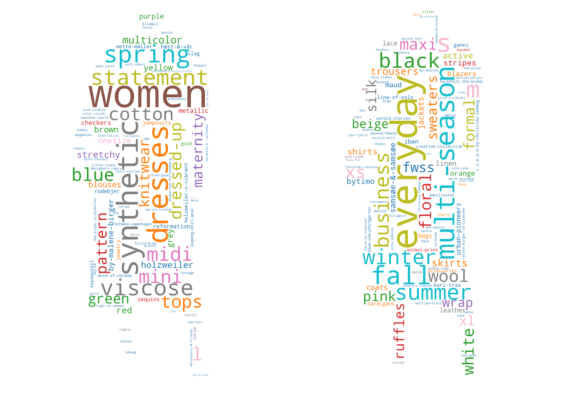

In [102]:
import matplotlib.pyplot as plt

category_colors = {
    'Brand': '#1f77b4',      # Blue
    'Category': '#ff7f0e',   # Orange
    'Color': '#2ca02c',      # Green
    'Details': '#d62728',    # Red
    'Fit': '#9467bd',        # Purple
    'Gender': '#8c564b',     # Brown
    'Length': '#e377c2',     # Pink
    'Material': '#7f7f7f',   # Gray
    'Occasion': '#bcbd22',   # Olive
    'Seasons': '#17becf',    # Teal
    'Size': '#f7b6d2',       # Light Pink
}

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    category = stopwords_dict.get(word)
    return category_colors.get(category, 'black')

tag_string = " ".join(tag_list)
from wordcloud import WordCloud

wc = WordCloud(width=2896, height=4096, background_color="white", stopwords=stopwords, mask=mask_image)
wc.generate_from_frequencies(tag_freq_dict)
wc.recolor(color_func=color_func)
#wc.to_image()
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("reports/figures/tag_wordcloud_2.png", dpi=300, bbox_inches='tight')
plt.show()